# Ex. 2
Please fill-in your ID in the following cell, *No Names!*

Then fill your names in the next two cells.

In [25]:
id1 = "313593980"
id2 = "312244197"

name_student_1 = "binyamin, yagoda"
name_student_2 = "yonatan, yamin"

import pandas as pd
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
df = pd.DataFrame([id1])
#df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)

q1 - import the library and present the first three lines from the chosen country

In [17]:
import numpy as np
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
Bulgaria_df = vacc_df[vacc_df['location'].str.contains('Bulgaria')].copy()
Bulgaria_df.head(3)



location iso_code        date  total_vaccinations  people_vaccinated  \
1906  Bulgaria      BGR  2020-12-29              1719.0             1719.0   
1907  Bulgaria      BGR  2020-12-30              4608.0             4608.0   
1908  Bulgaria      BGR  2020-12-31                 NaN                NaN   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
1906                      NaN                     NaN                 NaN   
1907                      NaN                  2889.0              2889.0   
1908                      NaN                     NaN              1477.0   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
1906                            0.02                           0.02   
1907                            0.07                           0.07   
1908                             NaN                            NaN   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
1906                                  NaN                             NaN  
1907                                  NaN                           416.0  
1908                                  NaN                           213.0

q2 - showing which row has the most missing values, and the number of them

In [18]:
print(Bulgaria_df.isnull().sum().idxmax())
Bulgaria_df.isnull().sum().max()

people_fully_vaccinated


20

q3 - present only the rows that contain empty values in the "daily vaccinations" column

In [19]:
Bulgaria_df[Bulgaria_df['daily_vaccinations'].isnull()]

location iso_code        date  total_vaccinations  people_vaccinated  \
1906  Bulgaria      BGR  2020-12-29              1719.0             1719.0   

      people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
1906                      NaN                     NaN                 NaN   

      total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
1906                            0.02                           0.02   

      people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
1906                                  NaN                             NaN

 q4 - filling the missing values in the "daily_vaccinations" column.
we completed the missing value from the data of "people vaccinated" on that day, because the only first day was missing, and It's the accurate number for that column.

In [26]:
Update_Vlaue = Bulgaria_df[Bulgaria_df['daily_vaccinations'].isnull()].iloc[0,4]
Bulgaria_df_update = Bulgaria_df[['daily_vaccinations']].fillna(Update_Vlaue)
Bulgaria_df_update


daily_vaccinations
1906              1719.0
1907              2889.0
1908              1477.0
1909              1007.0
1910               799.0
...                  ...
2011             10123.0
2012             10275.0
2013              9694.0
2014              9533.0
2015              9451.0

[110 rows x 1 columns]

q5 - create a combined histogram for "people vaccinated", "total vaccinations" columns.

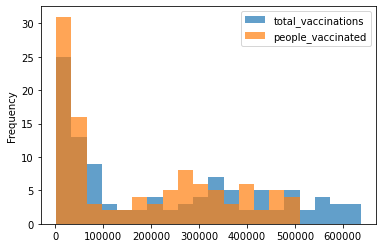

In [21]:
Bulgaria_df[['total_vaccinations','people_vaccinated']].plot.hist(bins= 20, alpha=0.7)


q6 - The green line in the boxplot represents the median, The blue (horizontal) lines represent the quarters.

0.635


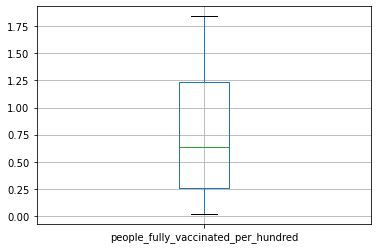

In [28]:
print(Bulgaria_df.people_fully_vaccinated_per_hundred.median())
Bulgaria_df.boxplot('people_fully_vaccinated_per_hundred')

q7 - Add a "month" column representing the month for each record. present the
"people vaccinated per hundred" and the "daily_vaccinations" columns that have maximum monthly vaccinations.

In [23]:
Bulgaria_df['date']= pd.to_datetime(Bulgaria_df.date)
Bulgaria_df['month'] =  pd.DatetimeIndex(Bulgaria_df.date).month
Bulgaria_df_max_mon = Bulgaria_df.groupby('month')[['people_vaccinated_per_hundred', 'daily_vaccinations']].max()
Bulgaria_df_max_mon

people_vaccinated_per_hundred  daily_vaccinations
month                                                   
1                               0.40              2140.0
2                               2.52             14486.0
3                               5.43             13649.0
4                               7.33             10275.0
12                              0.07              2889.0

q8 - Sort the data we presented in section 7 according to the "people_vaccinated_per_hundred"  column,  that they will be displayed
From the smallest value to the largest

In [24]:
Bulgaria_df_max_mon.sort_values('people_vaccinated_per_hundred')

people_vaccinated_per_hundred  daily_vaccinations
month                                                   
12                              0.07              2889.0
1                               0.40              2140.0
2                               2.52             14486.0
3                               5.43             13649.0
4                               7.33             10275.0